In [22]:
# Plots the residence time distribution from raw data
# Based on http://websites.umich.edu/~elements/course/lectures/thirteen/index.htm

import math
import pandas
from pathlib import Path
import numpy as np
%matplotlib inline

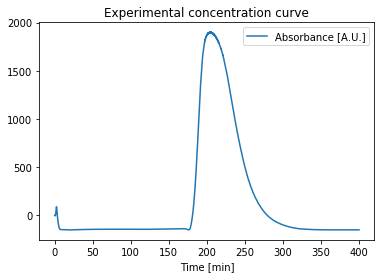

In [23]:
# Give the path to the csv-file with the tracer experiment
tracer_xp = Path(r"W:\BS-FlowChemistry\People\Wei-Hsin\20200413_whhsu046_RTD_tubing_01_300_320 - 305nm.txt")

# Read it into a Pandas Dataframe
experimental_data = pandas.read_csv(tracer_xp, header=16, sep='\t')
# (rename dataframe columns for clarity)
experimental_data.columns = ["Time [min]", "Absorbance [A.U.]"]
# Plot curve
experimental_data.plot(x=0, y=1, title="Experimental concentration curve")

In [24]:
# Baseline correction
min_value = pandas.Series.sort_values(experimental_data["Absorbance [A.U.]"], ascending = True)[:200].mean()
experimental_data['corrected_signal'] = experimental_data["Absorbance [A.U.]"] - min_value

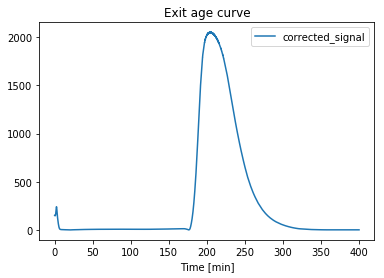

In [25]:
# Nomolization: get the AUC of the experimental concentration curve:
auc = np.trapz(experimental_data["corrected_signal"], x=experimental_data["Time [min]"])

# the exit age curve E(t) is obtained dividing the Y-axis by the AUC (total integral = 1):
experimental_data['E'] = experimental_data["corrected_signal"] / auc

# Plot curve
experimental_data.plot(x=0, y=2, title="Exit age curve")

In [26]:
mean_time = np.trapz(experimental_data['E'] * experimental_data["Time [min]"],x=experimental_data["Time [min]"])/ np.trapz(experimental_data['E'],x=experimental_data["Time [min]"])
variance = np.trapz((experimental_data["Time [min]"] - mean_time) ** 2 * experimental_data['E'],x=experimental_data["Time [min]"])

sigma = math.sqrt(variance)

print(f'The mean residence time tau is: {mean_time:.3f} ± {sigma:.3f}.')

The mean residence time tau is: 217.882 ± 32.188.
